In [1]:
import pandas as pd
import numpy as np
chunk = pd.read_csv("final_animedataset.csv", chunksize=1000000)
for df in chunk:
    break
#df = pd.read_csv("final_animedataset.csv") #uncomment to use the entire dataset
df.head(5)

,username,anime_id,my_score,user_id,gender,title,type,source,score,scored_by,rank,popularity,genre
0,karthiga,21,9,2255153,Female,One Piece,TV,Manga,8.54,423868,91.0,35,"Action, Adventure, Comedy, Super Power, Drama,..."
1,karthiga,59,7,2255153,Female,Chobits,TV,Manga,7.53,175388,1546.0,188,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen"
2,karthiga,74,7,2255153,Female,Gakuen Alice,TV,Manga,7.77,33244,941.0,1291,"Comedy, School, Shoujo, Super Power"
3,karthiga,120,7,2255153,Female,Fruits Basket,TV,Manga,7.77,167968,939.0,222,"Slice of Life, Comedy, Drama, Romance, Fantasy..."
4,karthiga,178,7,2255153,Female,Ultra Maniac,TV,Manga,7.26,9663,2594.0,2490,"Magic, Comedy, Romance, School, Shoujo"


In [2]:
df_filtered = df[df.my_score != 0] #Filter out all 0 scores. Zero mean that user haven't giver review but field still exists

In [2]:
#explode all genres into columns
genre = df['genre'].str.split(', ')
unique_genre = list({x for l in genre.dropna() for x in l})
df1 = pd.DataFrame(df)
for i in unique_genre:
    df1[i] = genre.map(lambda x: i in x, na_action="ignore")
print(df1.head(5))

   username  anime_id  my_score  user_id  gender          title type source  \
0  karthiga        21         9  2255153  Female      One Piece   TV  Manga   
1  karthiga        59         7  2255153  Female        Chobits   TV  Manga   
2  karthiga        74         7  2255153  Female   Gakuen Alice   TV  Manga   
3  karthiga       120         7  2255153  Female  Fruits Basket   TV  Manga   
4  karthiga       178         7  2255153  Female   Ultra Maniac   TV  Manga   

   score  scored_by  ...  Dementia  Sports Action  Drama Sci-Fi Military  \
0   8.54     423868  ...     False   False   True   True  False    False   
1   7.53     175388  ...     False   False  False   True   True    False   
2   7.77      33244  ...     False   False  False  False  False    False   
3   7.77     167968  ...     False   False  False   True  False    False   
4   7.26       9663  ...     False   False  False  False  False    False   

  School Slice of Life Martial Arts   Yaoi  
0  False         False 

In [ ]:
#Check if there are mismatches among the same anime. Takes forever to run.(7700k 7:40 min)
'''
for title in df1["title"].unique():
    genre_val = df1[df1["title"]==title][unique_genre].sum()
    if (np.unique(genre_val).size > 2):
        print("Theres genre mismatch for title", title)
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)
for n, title in enumerate(df["title"].unique()):
    print(n, unique_cols(df[df["title"]==title][["title", "popularity", "rank", "scored_by", "score", "source", "type"]]))'''


# Generate genre rating by gender

In [ ]:
a = df_filtered.groupby(["gender", "genre"], as_index = False).agg({"my_score": ["sum", "count"]})
a

gender                                              genre my_score      
                                                                     sum count
0     Female                                             Action      196    35
1     Female                                  Action, Adventure      129    18
2     Female                    Action, Adventure, Cars, Sci-Fi       18     3
3     Female  Action, Adventure, Comedy, Demons, Fantasy, Ma...        9     2
4     Female  Action, Adventure, Comedy, Demons, Shounen, Su...       22     3
...      ...                                                ...      ...   ...
5664    Male                                Supernatural, Music        4     1
5665    Male                        Supernatural, School, Drama       70    10
5666    Male                              Supernatural, Shounen       17     3
5667    Male                                   Thriller, Sci-Fi      699    77
5668    Male                                            Vampire        3     1

[5669 rows x 4 columns]

In [7]:

genre = a.genre.str.split(', ') #explode genre after grouping, saves a lot computing ja memory space
unique_genre = list({x for l in genre.dropna() for x in l})
for i in unique_genre:
    a[i] = genre.map(lambda x: i in x, na_action="ignore")
print(a.head(5))

   gender                                              genre my_score        \
                                                                  sum count   
0  Female                                             Action      196    35   
1  Female                                  Action, Adventure      129    18   
2  Female                    Action, Adventure, Cars, Sci-Fi       18     3   
3  Female  Action, Adventure, Comedy, Demons, Fantasy, Ma...        9     2   
4  Female  Action, Adventure, Comedy, Demons, Shounen, Su...       22     3   

    Yaoi Shounen  Drama  Music Fantasy   Cars  ... Thriller Vampire  \
                                               ...                    
0  False   False  False  False   False  False  ...    False   False   
1  False   False  False  False   False  False  ...    False   False   
2  False   False  False  False   False   True  ...    False   False   
3  False    True  False  False    True  False  ...    False   False   
4  False    True  Fa

C:\Users\Jako\AppData\Local\Temp\ipykernel_19356\1852076157.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  mean = s[("my_score", "sum")].sum() / s[("my_score", "count")].sum()


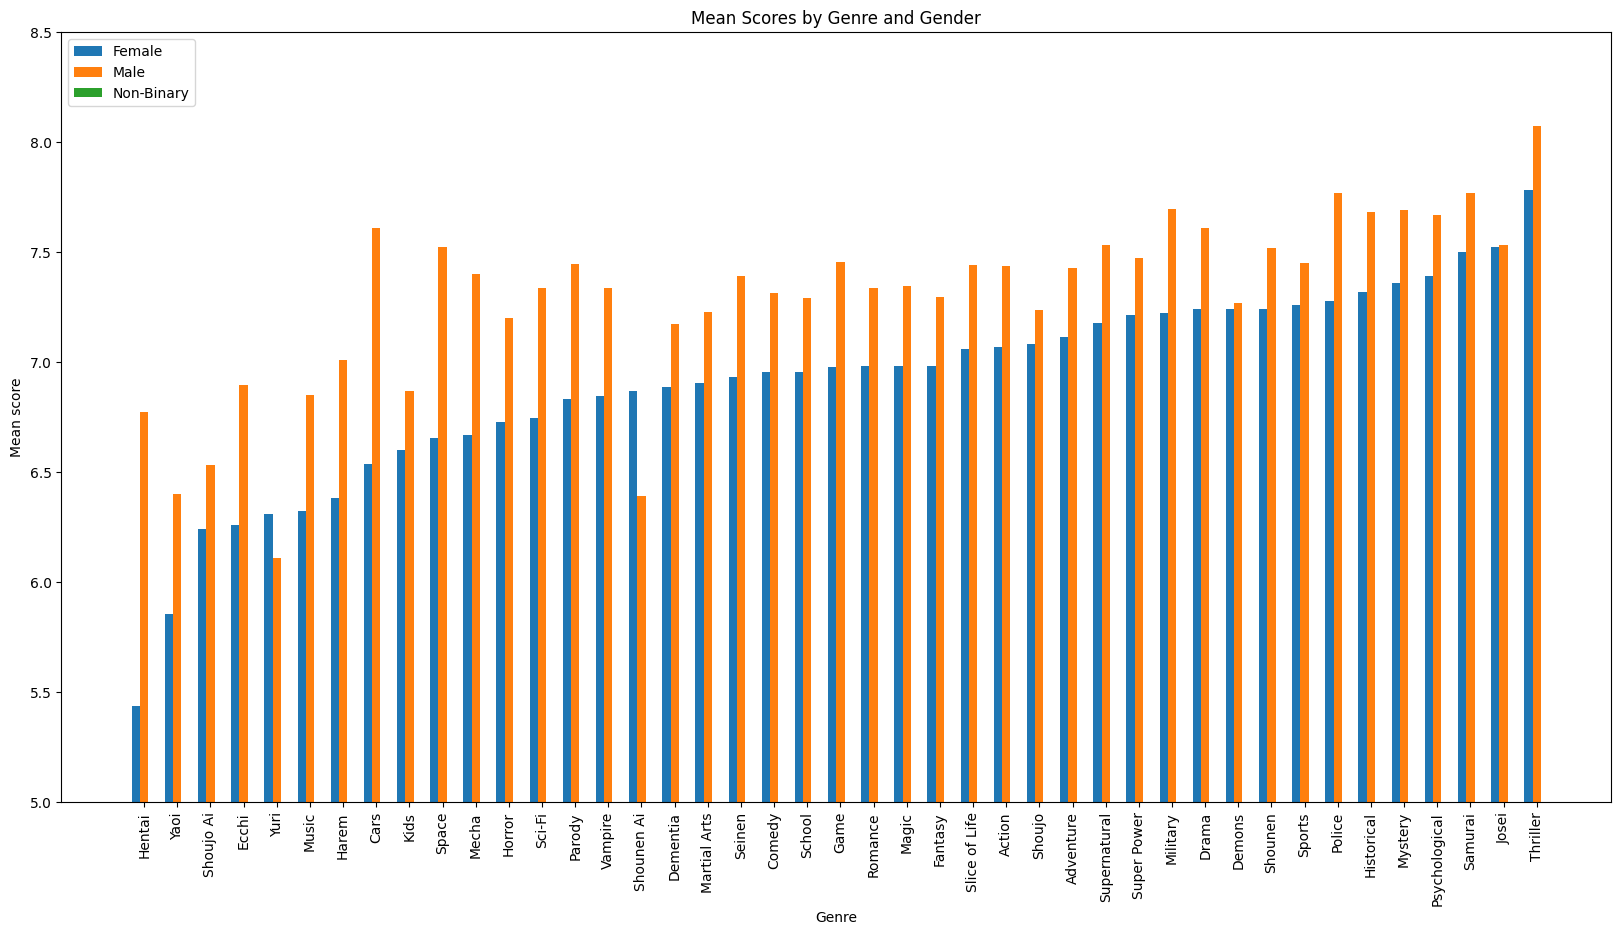

In [9]:
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('default')  # Use default light mode style

plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
bar_width = 0.25
index = np.arange(len(unique_genre))

# Calculate mean scores for each gender and genre
mean_scores = {"Female": {}, "Male": {}, "Non-Binary": {}}
for i, g in enumerate(["Female", "Male", "Non-Binary"]):
    for genre in unique_genre:
        s = a.loc[(a["gender"] == g) & (a[genre] == True)]
        mean = s[("my_score", "sum")].sum() / s[("my_score", "count")].sum()
        mean_scores[g][genre] = mean

# Sort genres by female mean score
sorted_genres = sorted(mean_scores["Female"].items(), key=lambda item: item[1])
sorted_genres = [genre for genre, score in sorted_genres]

# Plot the sorted genres
for i, g in enumerate(["Female", "Male", "Non-Binary"]):
    values = [mean_scores[g][genre] for genre in sorted_genres]
    ax.bar(index + i * bar_width, values, bar_width, label=g)

ax.set_ylim([5, 8.5])
ax.set_xticks(index + bar_width)
ax.set_xticklabels(sorted_genres, rotation=90)
plt.legend(loc="upper left")
plt.ylabel("Mean score")
plt.xlabel("Genre")
plt.title("Mean Scores by Genre and Gender")
plt.show()

# First look into best animes by genre

In [10]:
sex = (df1["Hentai"]==True) | (df1["Ecchi"]==True) | (df1["Harem"]==True) | (df1["Yaoi"]==True)
print(df1.loc[sex & (df1["gender"]=="Male")]["my_score"].mean())
print(df1.loc[sex & (df1["gender"]=="Male")]["my_score"].std())
print(df1.loc[sex & (df1["gender"]=="Female")]["my_score"].mean())
print(df1.loc[sex & (df1["gender"]=="Female")]["my_score"].std())

6.919126938541068
1.864587058691769
6.2224866151100535
1.963171329815012


In [11]:
best = ("", 0)
for title in df1.loc[sex]["title"].unique():
    score = df1.loc[sex & (df1["title"]==title)]["score"].mean()
    if score > best[1]:
        best = (title, score)
    print(title, score)
print("Best sex", best)

Chobits 7.529999999999998
Ouran Koukou Host Club 8.340000000000002
Air Gear 7.639999999999999
Crayon Shin-chan 7.730000000000001
Kiniro no Corda: Primo Passo 7.63
Chu-Bra!! 6.3
B-gata H-kei 7.100000000000001
Golden Boy 8.040000000000001
Gantz 7.199999999999999
Gantz 2nd Stage 7.22
Enzai 5.480000000000001
Papa to Kiss in the Dark 6.380000000000001
Boku no Pico 4.99
Okane ga Nai 6.49
Kirepapa. 6.94
Sekirei 7.319999999999999
Pico x CoCo x Chico 5.02
ChäoS;HEAd 6.519999999999998
Pico to Chico 5.04
Ichiban Ushiro no Daimaou 7.139999999999998
Kachou no Koi 6.36
Kami nomi zo Shiru Sekai 7.880000000000001
Koisuru Boukun 7.47
Kore wa Zombie Desu ka? 7.590000000000001
Oniichan no Koto nanka Zenzen Suki ja Nai n da kara ne!! 6.2700000000000005
Kami nomi zo Shiru Sekai II 8.07
Uta no☆Prince-sama♪ Maji Love 1000% 7.299999999999999
Rinkan Club 6.69
Boku wa Tomodachi ga Sukunai 7.470000000000001
Euphoria 6.580000000000001
Nisemonogatari 8.2
Medaka Box 7.169999999999999
Uta no☆Prince-sama♪ Maji Love 2

In [12]:
pd.set_option('display.max_columns', None)
df1.loc[df1["title"]==best[0]].head(1)

,username,anime_id,my_score,user_id,gender,title,type,source,score,scored_by,rank,popularity,genre,Yaoi,Shounen,Drama,Music,Fantasy,Cars,Shoujo Ai,Seinen,Police,Magic,Demons,Slice of Life,Adventure,Ecchi,Sports,Shounen Ai,Mecha,Mystery,Sci-Fi,Historical,Yuri,Romance,Space,Kids,Harem,Horror,Martial Arts,Dementia,Samurai,Shoujo,Supernatural,School,Action,Thriller,Vampire,Super Power,Comedy,Military,Josei,Psychological,Hentai,Game,Parody
5792,MistButterfly,33674,8,2485327,Female,No Game No Life: Zero,Movie,Light novel,8.74,78743,40.0,320,"Comedy, Ecchi, Fantasy, Game, Supernatural",False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False


In [13]:
df1.loc[df1["Music"]==True]["title"].unique()

array(['Kiniro no Corda: Primo Passo', 'Nodame Cantabile',
       'Nodame Cantabile: Paris-hen', 'Nodame Cantabile Finale', 'Nana',
       'Uta no☆Prince-sama♪ Maji Love 1000%',
       'Kami nomi zo Shiru Sekai: 4-nin to Idol',
       'Kami nomi zo Shiru Sekai: Natsu-iro Surprise',
       'Sakamichi no Apollon', 'Uta no☆Prince-sama♪ Maji Love 2000%',
       'Miss Monochrome: The Animation', 'Monotonous Purgatory', 'Beck',
       'Shigatsu wa Kimi no Uso', 'Nerima Daikon Brothers',
       'Full Moon wo Sagashite', 'Detroit Metal City', 'K-On!', 'K-On!!',
       'RahXephon', 'Gravitation', 'Genius Party', 'White Album',
       'White Album 2nd Season', 'Tonari no 801-chan R',
       'Magical☆Star Kanon 100%', 'Shounen Hollywood: Holly Stage for 49',
       'Macross 7', 'Senki Zesshou Symphogear', 'Wake Up, Girls!',
       'SoniAni: Super Sonico The Animation', 'Macross F',
       'Love Live! School Idol Project',
       'Love Live! School Idol Project 2nd Season',
       'Love Live! Scho

In [14]:
df1.loc[df1["title"]=="Stein"]["my_score"]

Series([], Name: my_score, dtype: int64)

In [16]:

best_dementia = ("", 0)
for title in df1.loc[df1["Dementia"]==True]["title"].unique():
    score = df1.loc[df1["title"]==title]["score"].mean()
    if score > best_dementia[1]:
        best_dementia = (title, score)
    #print(title, score)
print("Best dementia", best_dementia)

Best dementia ('Neon Genesis Evangelion: The End of Evangelion', 8.480000000000002)


# Generate rank, popularity and unrated anime rating loss plot

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, 'Comedy'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Fantasy'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Sci-Fi'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Shounen'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'School'),
  Text(9, 0, 'Hentai'),
  Text(10, 0, 'Supernatural'),
  Text(11, 0, 'Slice of Life'),
  Text(12, 0, 'Mecha'),
  Text(13, 0, 'Magic'),
  Text(14, 0, 'Ecchi'),
  Text(15, 0, 'Seinen'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'Mystery'),
  Text(18, 0, 'Shoujo'),
  Text(19, 0, 'Historical'),
  Text(20, 0, 'Military'),
  Text(21, 0, 'Super Power'),
  Text(22, 0, 'Sports'),
  Text(23, 0, 'Kids'),
  Text(24, 0, 'Harem'),
  Text(25, 0, 'Space'),
  Text(26, 0, 'Horror'),
  Text(27, 0, 'Parody'),
  Text(28, 0, 'Demons'),
  Text(29, 0, 

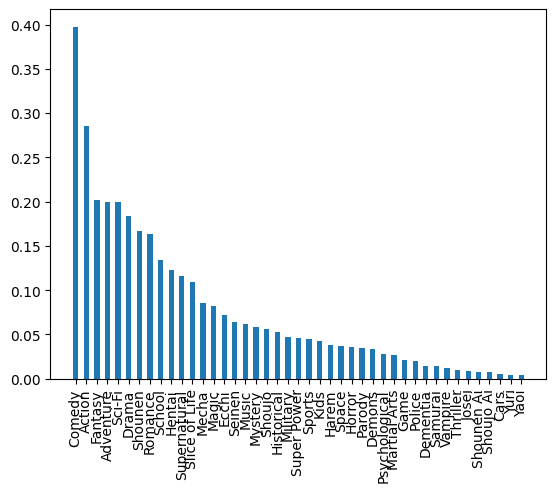

In [3]:
import matplotlib.pyplot as plt
title_genre_count = []
for i in unique_genre:
    title_genre_count.append(df.loc[df1[i]==True]["title"].unique().size)
k = pd.DataFrame({"genre":unique_genre, "count":title_genre_count}).sort_values("count", ascending=False)
plt.bar(k["genre"],k["count"]/df1["title"].unique().size, width=0.5)
plt.xticks(rotation=90)

In [4]:
df_zero = df[df.my_score == 0]
z = df_zero.groupby(["title"]).agg({"score": ["first"], "popularity": ["first"], "scored_by": ["first"], "username": ["count"]})
a = df.groupby(["title"]).agg({"username": ["count"]})
z["total"] = a["username"]
z["%"]=z["username"]/a["username"]


,score,popularity,scored_by,username,total,%
,first,first,first,count,,
title,,,,,,
Otome*Domain The Animation,7.14,7127,523,3,3,1.000000
Tsuki wa Higashi ni Hi wa Nishi ni: Operation Sanctuary OVA,5.90,8871,211,6,6,1.000000
Idol Kyousei Sousa,4.62,7303,398,2,2,1.000000
Sayonara no Asa ni Yakusoku no Hana wo Kazarou,8.22,2227,873,74,74,1.000000
Shin Strange+ Special,6.01,7663,267,5,5,1.000000
...,...,...,...,...,...,...
Baymax,6.07,8368,536,1,10,0.100000
Love Like Aliens,5.62,8799,412,1,10,0.100000


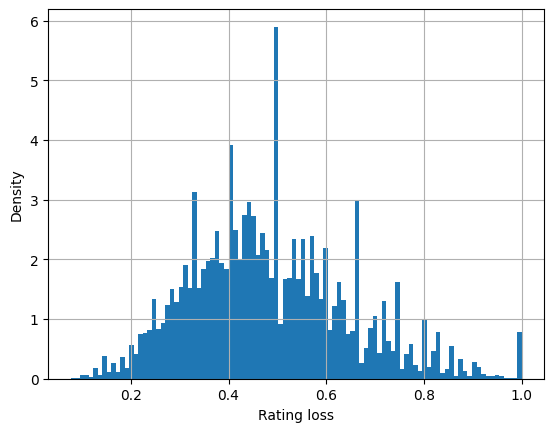

In [5]:
ax = z["%"].hist(bins=100, density=1)
ax.set_ylabel("Density")
ax.set_xlabel("Rating loss")
z.sort_values("%", ascending=False)

title
"0"                                          6833
"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi    2978
"Bungaku Shoujo" Memoire                     2581
"Bungaku Shoujo" Movie                       1556
"Eiji"                                       8010
                                             ... 
xxxHOLiC Movie: Manatsu no Yoru no Yume      1602
xxxHOLiC Rou                                 1674
xxxHOLiC Shunmuki                            1592
ēlDLIVE                                      1995
◯                                            8371
Name: first, Length: 8721, dtype: int64


,score,popularity,scored_by,username,total,%
,first,first,first,count,,
title,,,,,,
One Piece,8.54,35,423868,655,2201,0.297592
Death Note,8.67,1,1009477,218,1937,0.112545
Naruto,7.88,10,648605,239,1826,0.130887
Bleach,7.90,18,433097,349,1804,0.193459
Code Geass: Hangyaku no Lelouch,8.79,9,627740,347,1709,0.203043
...,...,...,...,...,...,...
Do S na Seitokaichou-sama ga M Note ni Shihai Saremashita.,6.45,7183,360,1,1,1.000000
Ichinen Buri no The Animation,6.33,7238,649,1,1,1.000000


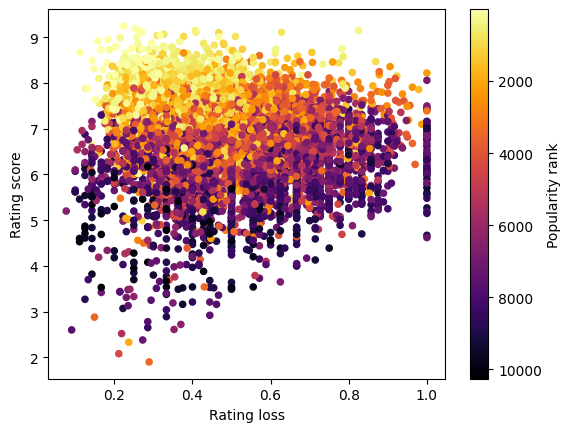

In [6]:
#a = (z["scored_by"])["first"]
a = (z["popularity"])["first"]
print(a)
ax = z.plot("%", "score", kind="scatter", c=a, cmap='inferno_r')
ax.set_ylabel("Rating score")
ax.set_xlabel("Rating loss")
cbar = plt.gcf().get_axes()[1]
cbar.invert_yaxis()
cbar.set_ylabel("Popularity rank")
z.sort_values("total", ascending=False)

type
Movie      6.001877
TV         5.798654
Music      5.318987
Special    5.317884
OVA        4.965256
ONA        4.623699
dtype: float64


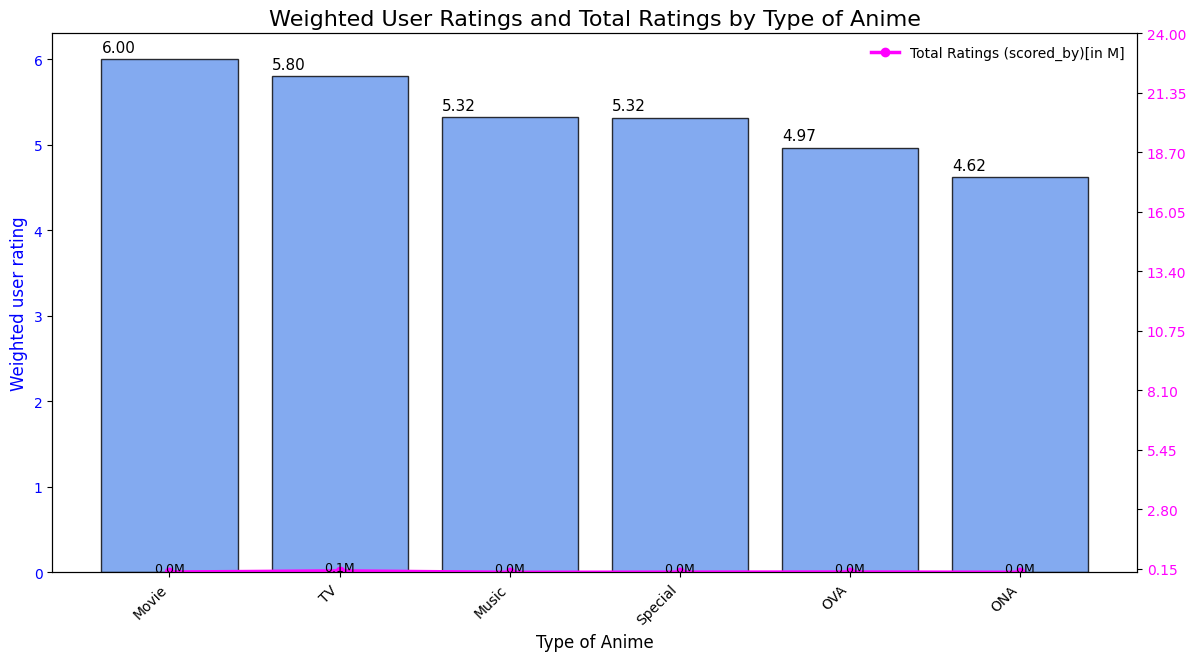

In [9]:
import matplotlib.pyplot as plt
type_scores_correlation = df.groupby('type').apply(
    lambda x: (x['my_score'] * x["scored_by"]).sum() / x['scored_by'].sum(), include_groups=False
).sort_values(ascending=False)
print(type_scores_correlation)

type_ratings = df.groupby('type').agg({"scored_by": ["count"]})["scored_by"]["count"]
#print(f"type_ratings: {type_ratings[:5]}")

#plt.ticklabel_format(style='plain', axis='y')
fig, ax1 = plt.subplots(figsize=(14, 7))

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


bars = ax1.bar(type_scores_correlation.index, type_scores_correlation, 
               color='cornflowerblue', alpha=0.8, label='Weighted My Score', edgecolor='black')
ax1.set_xlabel('Type of Anime', fontsize=12)
ax1.set_ylabel('Weighted user rating', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
ax1.set_xticks(type_scores_correlation.index)
ax1.set_xticklabels(type_scores_correlation.index, rotation=45, ha='right', fontsize=10)


for bar in bars:
    ax1.text(bar.get_x() + 0.2, bar.get_height() + 0.05,
             f'{bar.get_height():.2f}', ha='right', va='bottom', fontsize=11, color='black')

# Line plot for Total Ratings
ax2 = ax1.twinx()
adjusted_total_ratings = type_ratings[type_scores_correlation.index] / 1e6  # Convert to millions
line = ax2.plot(adjusted_total_ratings, 
                color='magenta', marker='o', label='Total Ratings (scored_by)[in M]', linewidth=2.5)
#line, = ax2.plot(type_ratings[type_scores_correlation.index], 
#                 color='magenta', marker='o', label='Total Ratings (scored_by)', linewidth=2.5)

#ax2.set_ylabel('Total Ratings', color='magenta', fontsize=12)
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='magenta', labelsize=10)
ax2.set_yticks(np.linspace(start=0.15, stop=24, num=10))
#ax2.ticklabel_format(style = 'plain')
#ax2.set_ylim(bottom=1_000, top=1.5e7)


for i, value in enumerate(adjusted_total_ratings):
    ax2.text(i, value + adjusted_total_ratings.max() * 0.025, f'{value:.1f}M', color='k', ha='center', fontsize=9)


ax2.legend(loc='upper right', frameon=False, fontsize=10)

#fig.suptitle('Weighted User Ratings and Total Ratings by Type of Anime', fontsize=14)
plt.title('Weighted User Ratings and Total Ratings by Type of Anime', fontsize=16)
#fig.tight_layout(rect=[0, 0, 0.85, 1]) 
#plt.subplots_adjust(right=0.8)

#plt.savefig('type_ratings.png')
plt.show()

In [45]:
df["scored_by"].iloc[215]
df['my_score'].iloc[2] * df["scored_by"].iloc[2]

np.int64(232708)

# User specific analysis

In [3]:
a = df.groupby(["username", "genre"], as_index = False).agg({"my_score":["sum", "count"]})
a

username                                              genre  \
                                                                           
0            -Kenjiro  Action, Adventure, Comedy, Fantasy, Magic, Sci...   
1            -Kenjiro  Action, Adventure, Comedy, Fantasy, Martial Ar...   
2            -Kenjiro  Action, Adventure, Comedy, Magic, Fantasy, Sho...   
3            -Kenjiro  Action, Adventure, Comedy, Super Power, Martia...   
4            -Kenjiro   Action, Adventure, Comedy, Supernatural, Shounen   
...               ...                                                ...   
48198  zombie_pegasus                              Supernatural, Fantasy   
48199  zombie_pegasus                           Supernatural, Historical   
48200  zombie_pegasus                                Supernatural, Music   
48201  zombie_pegasus                        Supernatural, School, Drama   
48202  zombie_pegasus                                   Thriller, Sci-Fi   

      my_score        
           sum count  
0            2     1  
1           17     2  
2            8     1  
3           17     2  
4           16     2  
...        ...   ...  
48198        6     1  
48199        4     1  
48200        4     1  
48201        6     1  
48202        9     1  

[48203 rows x 4 columns]

In [4]:
genre = a.genre.str.split(', ')
unique_genre = list({x for l in genre.dropna() for x in l})
unique_genre

['Fantasy',
 'Shounen Ai',
 'Mecha',
 'Seinen',
 'Horror',
 'Mystery',
 'Shoujo',
 'Vampire',
 'Supernatural',
 'Magic',
 'Super Power',
 'Kids',
 'Adventure',
 'Police',
 'Space',
 'Samurai',
 'Parody',
 'Josei',
 'Slice of Life',
 'Military',
 'Historical',
 'Dementia',
 'School',
 'Thriller',
 'Action',
 'Shoujo Ai',
 'Demons',
 'Psychological',
 'Drama',
 'Ecchi',
 'Sci-Fi',
 'Yuri',
 'Shounen',
 'Sports',
 'Hentai',
 'Romance',
 'Cars',
 'Comedy',
 'Yaoi',
 'Music',
 'Harem',
 'Game',
 'Martial Arts']

In [5]:
#print(a.iloc[0]["my_score"]["sum"] if ("Action" in a.iloc[0]["genre"]) else 0)
#print("Action" in a.iloc[0]["genre"].values)
for i in unique_genre:
    print(i)
    a[i+"_sum"] = a.apply(lambda x: x["my_score"]["sum"] if (i in str(x["genre"].values)) else 0, axis=1)
    a[i+"_count"] = a.apply(lambda x: x["my_score"]["count"] if (i in str(x["genre"].values)) else 0, axis=1)
a


Fantasy
Shounen Ai
Mecha
Seinen
Horror
Mystery
Shoujo
Vampire
Supernatural
Magic
Super Power
Kids
Adventure
Police
Space
Samurai
Parody
Josei
Slice of Life
Military
Historical
Dementia
School
Thriller
Action
Shoujo Ai
Demons
Psychological
Drama
Ecchi
Sci-Fi
Yuri
Shounen
Sports
Hentai
Romance
Cars
Comedy
Yaoi
Music
Harem
Game
Martial Arts


username                                              genre  \
                                                                           
0            -Kenjiro  Action, Adventure, Comedy, Fantasy, Magic, Sci...   
1            -Kenjiro  Action, Adventure, Comedy, Fantasy, Martial Ar...   
2            -Kenjiro  Action, Adventure, Comedy, Magic, Fantasy, Sho...   
3            -Kenjiro  Action, Adventure, Comedy, Super Power, Martia...   
4            -Kenjiro   Action, Adventure, Comedy, Supernatural, Shounen   
...               ...                                                ...   
48198  zombie_pegasus                              Supernatural, Fantasy   
48199  zombie_pegasus                           Supernatural, Historical   
48200  zombie_pegasus                                Supernatural, Music   
48201  zombie_pegasus                        Supernatural, School, Drama   
48202  zombie_pegasus                                   Thriller, Sci-Fi   

      my_score       Fantasy_sum Fantasy_count Shounen Ai_sum  \
           sum count                                            
0            2     1           2             1              0   
1           17     2          17             2              0   
2            8     1           8             1              0   
3           17     2           0             0              0   
4           16     2           0             0              0   
...        ...   ...         ...           ...            ...   
48198        6     1           6             1              0   
48199        4     1           0             0              0   
48200        4     1           0             0              0   
48201        6     1           0             0              0   
48202        9     1           0             0              0   

      Shounen Ai_count Mecha_sum Mecha_count  ... Yaoi_sum Yaoi_count  \
                                              ...                       
0                    0         0           0  ...        0          0   
1                    0         0           0  ...        0          0   
2                    0         0           0  ...        0          0   
3                    0         0           0  ...        0          0   
4                    0         0           0  ...        0          0   
...                ...       ...         ...  ...      ...        ...   
48198                0         0           0  ...        0          0   
48199                0         0           0  ...        0          0   
48200                0         0           0  ...        0          0   
48201                0         0           0  ...        0          0   
48202                0         0           0  ...        0          0   

      Music_sum Music_count Harem_sum Harem_count Game_sum Game_count  \
                                                                        
0             0           0         0           0        0          0   
1             0           0         0           0        0          0   
2             0           0         0           0        0          0   
3             0           0         0           0        0          0   
4             0           0         0           0        0          0   
...         ...         ...       ...         ...      ...        ...   
48198         0           0         0           0        0          0   
48199         0           0         0           0        0          0   
48200         4           1         0           0        0          0   
48201         0           0         0           0        0          0   
48202         0           0         0           0        0          0   

      Martial Arts_sum Martial Arts_count  
                                           
0                    0                  0  
1                   17                  2  
2                    0                  0  
3                   17                  2  
4             

In [13]:
agg_sum = {i+"_sum":["sum"] for i in unique_genre}
agg_count = {i+"_count":["sum"] for i in unique_genre}
agg_genre = agg_sum | agg_count
#agg_genre["count"] = ["sum"]
b = a.droplevel(1, axis=1)[list(agg_genre.keys())+["username"]]
b["count"] = a["my_score"]["count"]
b = b.groupby(["username"], as_index = False).agg(agg_genre | {"count":["sum"]})
b[["username", "count"]].droplevel(1, axis=1).sort_values("count")

,username,count
64,L-LawlietDN,6
12,Awesomemikko,11
6,AnimeFan71194,15
136,Zodezu,16
128,VoliMedjed,17
...,...,...
68,LunarSonata,1301
195,zombie_pegasus,1496
8,Areq,1566
187,tamer91,1625


In [18]:
out = pd.DataFrame(columns=unique_genre+["username"])
out["username"] = b.username
out["count"] = b["count"]["sum"]
for i in unique_genre:
    out[i] = b.apply(lambda x: x[i+"_sum"]["sum"]/x[i+"_count"]["sum"] if (x[i+"_count"]["sum"] != 0) else 0, axis=1)
    out[i+"_count"] = b.apply(lambda x: x[i+"_count"]["sum"], axis=1)
out

,Fantasy,Shounen Ai,Mecha,Seinen,Horror,Mystery,Shoujo,Vampire,Supernatural,Magic,...,Sports_count,Hentai_count,Romance_count,Cars_count,Comedy_count,Yaoi_count,Music_count,Harem_count,Game_count,Martial Arts_count
0,7.212766,0.000000,7.428571,6.142857,7.666667,7.800000,3.000000,6.800000,7.461538,6.833333,...,0,0,68,0,82,0,0,38,8,5
1,7.273684,0.000000,7.000000,6.711111,7.041667,7.527778,7.350000,7.400000,7.233333,7.255319,...,4,11,119,0,173,0,7,54,11,17
2,7.875000,0.000000,0.000000,7.500000,7.500000,8.000000,7.375000,7.000000,7.555556,7.250000,...,1,0,31,0,29,0,2,5,0,0
3,8.040541,0.000000,8.350000,7.913043,7.785714,7.939394,8.058824,7.818182,8.093023,7.975610,...,5,0,118,0,188,0,11,29,11,16
4,6.578947,0.000000,7.500000,6.833333,4.600000,6.594595,6.750000,8.333333,6.591837,7.250000,...,7,0,48,0,98,0,11,7,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,9.000000,0.000000,0.000000,8.857143,9.000000,8.333333,8.909091,8.200000,8.625000,9.000000,...,5,0,44,0,56,0,3,13,3,2
192,7.820690,0.000000,7.700000,7.978723,7.739130,7.900000,7.666667,8.250000,8.088435,7.728571,...,7,0,231,0,322,0,10,98,14,29
193,8.421053,9.000000,8.416667,7.333333,6.333333,6.714286,9.500000,8.000000,7.583333,8.111111,...,1,0,10,0,26,0,0,0,0,5
194,7.784615,0.000000,7.972973,8.142857,8.250000,8.468750,8.111111,7.875000,8.187970,8.028169,...,10,4,211,1,439,0,12,122,22,23


In [ ]:
out.to_csv("user_analyse.csv")

# Look into User specific analyse

In [ ]:
import pandas as pd
out = pd.read_csv("user_analyse.csv")
chunk = pd.read_csv("final_animedataset.csv", chunksize=100000) # used to later stalk user ratings
for df in chunk:
    break
df_filtered = df[df.my_score != 0] #Filter out all 0 scores. Zero mean that user haven't giver review but field still exists

In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
out.sort_values("Mecha", ascending=False).head(10)

,Fantasy,Shounen Ai,Mecha,Seinen,Horror,Mystery,Shoujo,Vampire,Supernatural,Magic,Super Power,Kids,Adventure,Police,Space,Samurai,Parody,Josei,Slice of Life,Military,Historical,Dementia,School,Thriller,Action,Shoujo Ai,Demons,Psychological,Drama,Ecchi,Sci-Fi,Yuri,Shounen,Sports,Hentai,Romance,Cars,Comedy,Yaoi,Music,Harem,Game,Martial Arts,username,count,Fantasy_count,Shounen Ai_count,Mecha_count,Seinen_count,Horror_count,Mystery_count,Shoujo_count,Vampire_count,Supernatural_count,Magic_count,Super Power_count,Kids_count,Adventure_count,Police_count,Space_count,Samurai_count,Parody_count,Josei_count,Slice of Life_count,Military_count,Historical_count,Dementia_count,School_count,Thriller_count,Action_count,Shoujo Ai_count,Demons_count,Psychological_count,Drama_count,Ecchi_count,Sci-Fi_count,Yuri_count,Shounen_count,Sports_count,Hentai_count,Romance_count,Cars_count,Comedy_count,Yaoi_count,Music_count,Harem_count,Game_count,Martial Arts_count
137,9.285714,0.0,10.000000,10.000000,0.000000,8.000000,9.000000,0.000000,9.000000,8.666667,10.000000,0.000000,9.500000,0.000000,0.000000,0.000000,8.000000,9.000000,9.200000,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000,0.0,9.000000,10.000000,9.714286,10.000000,9.333333,0.0,9.166667,0.000000,0.0,9.600000,0.000000,9.214286,0.0,0.000000,10.000000,0.000000,8.000000,_mayumih,20,7,0,1,1,0,3,3,0,7,3,1,0,4,0,0,0,1,1,5,0,2,0,7,0,8,0,2,1,7,1,3,0,6,0,0,10,0,14,0,0,1,0,1
58,9.892857,0.0,10.000000,9.538462,9.750000,9.833333,9.600000,10.000000,9.784314,9.937500,9.825000,7.000000,9.700000,9.000000,0.000000,9.500000,9.636364,0.000000,9.818182,10.000000,9.700000,9.666667,9.800000,9.666667,9.817204,9.5,9.666667,9.769231,9.848485,9.875000,9.806452,0.0,9.802817,9.666667,10.0,9.955556,0.000000,9.761905,0.0,0.000000,9.961538,9.500000,9.800000,Jony,180,56,0,8,13,8,24,5,6,51,16,40,2,60,1,0,4,11,0,11,6,10,3,35,6,93,4,3,13,33,48,31,0,71,3,1,45,0,126,0,0,26,2,10
91,9.375000,8.5,10.000000,8.000000,8.250000,10.000000,9.555556,7.000000,8.833333,9.555556,10.000000,0.000000,9.714286,10.000000,10.000000,0.000000,7.000000,0.000000,8.000000,9.571429,9.000000,10.000000,9.000000,10.000000,9.583333,0.0,10.000000,9.428571,9.444444,9.000000,9.750000,0.0,9.090909,0.000000,9.0,9.055556,0.000000,9.210526,7.5,9.000000,10.000000,0.000000,0.000000,Raian-kun,42,16,2,4,1,4,4,9,2,6,9,2,0,14,1,2,0,1,0,4,7,3,3,3,2,12,0,1,7,27,2,8,0,11,0,1,18,0,19,2,1,1,0,0
183,8.562500,0.0,10.000000,8.500000,8.111111,8.966667,0.000000,9.000000,8.513514,8.000000,8.777778,0.000000,8.555556,10.000000,10.000000,9.500000,9.200000,9.000000,9.500000,9.800000,8.666667,9.750000,8.375000,9.727273,8.725000,0.0,7.833333,9.187500,8.678571,6.333333,9.312500,0.0,8.266667,10.000000,0.0,8.444444,0.000000,8.322581,0.0,0.000000,7.333333,0.000000,10.000000,shadowrost,73,16,0,4,4,9,30,0,4,37,14,9,0,18,2,1,2,5,1,6,5,6,4,8,11,40,0,6,16,28,3,16,0,15,1,0,18,0,31,0,0,3,0,1
145,8.000000,0.0,10.000000,0.000000,8.500000,8.000000,9.333333,0.000000,9.500000,8.333333,8.000000,0.000000,8.142857,10.000000,0.000000,0.000000,6.666667,0.000000,8.428571,8.000000,0.000000,0.000000,8.375000,10.000000,8.500000,0.0,7.000000,10.000000,8.875000,7.800000,7.666667,0.0,8.375000,0.000000,0.0,8.600000,0.000000,8.466667,0.0,0.000000,7.666667,0.000000,8.000000,clannad187,24,6,0,1,0,2,5,3,0,8,3,2,0,7,1,0,0,3,0,7,1,0,0,8,1,12,0,1,1,8,5,6,0,8,0,0,10,0,15,0,0,3,0,2
61,9.531746,9.0,9.666667,9.615385,9.285714,9.125000,9.687500,9.000000,9.461538,9.629630,9.615385,9.535714,9.635593,9.500000,10.000000,9.000000,9.250000,6.666667,9.388889,9.333333,9.300000,9.750000,9.409091,9.583333,9.625954,9.0,9.642857,9.555556,9.500000,9.466667,9.528302,0.0,9.616162,9.400000,9.0,9.350000,0.000000,9.562500,0.0,9.500000,9.214286,9.000000,9.533333,Kito-kun,264,126,4,9,13,14,32,16,1,52,27,39,28,118,4,2,2,8,3,18,6,10,4,44,12,131,1,14,18,76,15,53,0,99,5,2,60,0,160,0,2,14,7,15
78,8.977778,0.0,9.636364,8.857143,9.000000,9.545455,9.607143,9.222222,9.395349,9.250000,9.466667,0.000000,9.239130,10.000000,10.000000,10.000000,8.428571,9.3

In [59]:
df_filtered[(df["username"]=="Tomoki-sama") & (df['genre'].str.contains("Mecha"))]

,username,anime_id,my_score,user_id,gender,title,type,source,score,scored_by,rank,popularity,genre
9501,Tomoki-sama,1575,10,1933206,Male,Code Geass: Hangyaku no Lelouch,TV,Original,8.79,627740,30.0,9,"Action, Military, Sci-Fi, Super Power, Drama, ..."
9504,Tomoki-sama,2001,10,1933206,Male,Tengen Toppa Gurren Lagann,TV,Original,8.74,449656,41.0,24,"Action, Adventure, Comedy, Mecha, Sci-Fi"
9508,Tomoki-sama,2904,10,1933206,Male,Code Geass: Hangyaku no Lelouch R2,TV,Original,8.95,543904,18.0,22,"Action, Military, Sci-Fi, Super Power, Drama, ..."
9587,Tomoki-sama,15583,9,1933206,Male,Date A Live,TV,Light novel,7.47,248521,1719.0,104,"Comedy, Harem, Mecha, Romance, School, Sci-Fi"
9626,Tomoki-sama,22729,10,1933206,Male,Aldnoah.Zero,TV,Original,7.57,184307,1419.0,181,"Action, Military, Sci-Fi, Mecha"
9640,Tomoki-sama,27655,10,1933206,Male,Aldnoah.Zero 2nd Season,TV,Original,7.11,122672,3146.0,379,"Action, Mecha, Sci-Fi, Space"
9676,Tomoki-sama,35849,10,1933206,Male,Darling in the FranXX,TV,Original,8.17,76973,342.0,239,"Action, Sci-Fi, Drama, Mecha"
9778,Tomoki-sama,30749,8,1933206,Male,Saijaku Muhai no Bahamut,TV,Light novel,6.87,75521,4049.0,509,"Action, Harem, Supernatural, Romance, Ecchi, F..."
9799,Tomoki-sama,3352,9,1933206,Male,Tengen Toppa Gurren Lagann: Mitee Mono wa Mite...,Special,Original,7.45,13744,1833.0,2131,"Action, Adventure, Comedy, Mecha, Sci-Fi"
9851,Tomoki-sama,4107,10,1933206,Male,Tengen Toppa Gurren Lagann Movie 1: Gurren-hen,Movie,Original,8.22,49113,295.0,914,"Action, Comedy, Mecha"
